In [1]:
# this notebook follows on from make_visit_trajectories

In [ ]:
# Conclusions of modelling with trajectory (grad/intercept):
# we are modelling trajectory to death from CKD
# - using PCA components and features of importance in PCA did not perform well
# - best performing was random forest on all trajectory features

# - NEXT: we need to read Rachel's thesis and define th

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
pd.set_option('display.max_rows', 500)

In [3]:
filename = '../Data/big_cats/processed_data/grad_intercept_data_15_09_2021.csv'
total_df = pd.read_csv(filename)

### do train/test split

In [4]:
from sklearn.model_selection import train_test_split 
cols_x = list(total_df.columns)
cols_x.remove('ARKS Number')
cols_x.remove('CKD - cause of mortality')
X = total_df[cols_x].values
y = total_df['CKD - cause of mortality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [5]:
sum(y_train)/len(y_train)

0.3360655737704918

In [6]:
sum(y_test)/len(y_test)

0.3548387096774194

### Impute missing intercepts and gradients

In [7]:
imputer = KNNImputer(n_neighbors=2)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Random forest

In [8]:
import sklearn
sklearn.__version__

'0.24.2'

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=0)

In [10]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(cols_x, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False) #.plot(kind='bar', rot=45)

,Gini-importance
biochem: Hypercreatininaemia?_intercept,0.044997
biochem: Hypercreatininaemia?_grad,0.033399
biochem: Creatinine (umol/L)_grad,0.025481
haem: neutrophils (band)_intercept,0.024040
biochem: Low USG?_grad,0.020238
haem: neutrophils(seg) (x10^9/L)_grad,0.020080
biochem: Bicarbonate_grad,0.019276
haem: neutrophils (band)_grad,0.017136
haem: MCH (pg)_intercept,0.016721
biochem: Cholesterol (mmol/L)_grad,0.016529


In [11]:
importances['Gini-importance'].sum()

1.0

In [12]:
# do cross validation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=4, scoring='f1_macro')
scores

array([0.66304348, 0.68686869, 0.6       , 0.68888889])

In [13]:
print(scores.mean())

0.6597002635046114


<div style='color: FloralWhite; padding: 2rem; background-image: radial-gradient(farthest-corner at 40px 40px,
      #008080 0%, #4fb 100%); font-weight: 500'>
<h2 style='padding: 0; margin-bottom: 1rem; margin-top:0;'> Next Steps </h2> 
<li> Look at correlations {done}</li>
<li> Do PCA then try to disentangle components {done} https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com {done}</li>
<li> Plot cumulative explained variance as function of number of PCs shown here https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db {done} </li>
<li> recreate step 2 here: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/ {done}</li>
<li> Do a random forest using the 7 PCs!  {done} </li>
<li> Remake train, test, validation set CONTINUE HERE</li>
<li> Run validation for each of the 3 methods and compare results</li>
</div>


# PCA on grad/intercept 
What are the grads/intercepts that explain the most variance? 

In [14]:
import sklearn.datasets, sklearn.decomposition
X = X_train
mu = np.mean(X, axis=0)
X_PCA = X - mu

In [15]:
# test on 20 components to compare variance explained against number of components
num_components = 20
pca = sklearn.decomposition.PCA(num_components)
pca.fit(X_PCA)

PCA(n_components=20)

In [16]:
print(pca.explained_variance_ratio_)

[7.16083193e-01 1.63484759e-01 7.06084238e-02 1.64729068e-02
 1.21439006e-02 6.93463768e-03 5.15307309e-03 3.69891327e-03
 1.51449515e-03 1.31977778e-03 7.06077004e-04 4.50649762e-04
 4.16599427e-04 3.27233718e-04 1.55730641e-04 1.20647650e-04
 9.25492223e-05 8.03702580e-05 5.31131840e-05 4.56156778e-05]


In [17]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
cum_sum

array([0.71608319, 0.87956795, 0.95017638, 0.96664928, 0.97879318,
       0.98572782, 0.99088089, 0.99457981, 0.9960943 , 0.99741408,
       0.99812016, 0.99857081, 0.99898741, 0.99931464, 0.99947037,
       0.99959102, 0.99968357, 0.99976394, 0.99981705, 0.99986267])

Text(0, 0.5, 'variance explained')

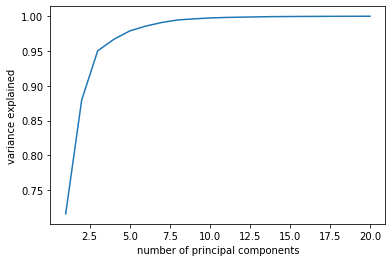

In [18]:
plt.plot(list(range(1, num_components+1)), cum_sum)
plt.xlabel('number of principal components')
plt.ylabel('variance explained')

In [19]:
# Elbow point is around 7 so decide to use 7 principal components

In [20]:
pca = sklearn.decomposition.PCA(7)
pca.fit(X_PCA)

PCA(n_components=7)

In [21]:
pca.components_.shape # (7 components, 153 features)

(7, 153)

In [22]:
pca.components_

array([[-1.11022302e-16, -1.11022302e-16,  1.61578483e-05, ...,
        -4.16856521e-06, -2.16525714e-06, -1.51778400e-06],
       [-5.55111512e-17, -6.24500451e-17,  4.18429267e-05, ...,
        -1.12731402e-05, -4.29179819e-06, -2.41658107e-06],
       [-1.11022302e-16,  1.66533454e-16, -2.00509500e-04, ...,
        -7.72685677e-05,  8.20100499e-06,  2.59535683e-05],
       ...,
       [ 1.38777878e-17, -7.63278329e-17, -3.95656202e-03, ...,
        -2.16225247e-05,  9.45299099e-06, -2.32360298e-05],
       [ 1.73472348e-17,  2.42861287e-17, -1.59282609e-08, ...,
        -3.83465446e-05, -1.96103436e-05, -7.20396822e-06],
       [ 5.55111512e-17, -6.93889390e-18, -1.75935436e-03, ...,
        -8.59664427e-05,  9.29571129e-04, -3.20573536e-06]])

In [23]:
len(cols_x)

153

In [24]:
df_pca = pd.DataFrame(pca.components_, columns=cols_x)
df_component_weights = df_pca.T
colnames = [f"PC{n+1}" for n in range(len(df_component_weights.columns))]
df_component_weights.columns = colnames

In [25]:
df_component_weights

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
age at visit days_grad,-1.110223e-16,-5.551115e-17,-1.110223e-16,-1.387779e-17,1.387779e-17,1.734723e-17,5.551115e-17
age at visit days_intercept,-1.110223e-16,-6.245005e-17,1.665335e-16,1.387779e-17,-7.632783e-17,2.428613e-17,-6.938894e-18
biochem: ALP (U/L)_grad,1.615785e-05,4.184293e-05,-2.005095e-04,3.388167e-04,-3.956562e-03,-1.592826e-08,-1.759354e-03
biochem: ALP (U/L)_intercept,-1.332486e-06,-8.742763e-06,1.649882e-04,-1.024848e-04,1.033743e-03,2.664892e-05,1.153615e-03
biochem: ALT (U/L)_grad,-5.435072e-06,-1.505308e-05,-1.835436e-04,-3.689590e-04,-4.689803e-04,-9.299822e-05,-1.300486e-03
biochem: ALT (U/L)_intercept,3.382603e-06,8.194467e-06,1.052111e-04,2.450173e-04,1.789600e-04,6.806179e-05,8.452870e-04
biochem: AST_grad,-1.241481e-04,8.349600e-03,3.316121e-03,-2.451650e-04,-5.209125e-03,2.675742e-04,4.182532e-03
biochem: AST_intercept,4.478966e-05,-3.041318e-03,-1.223801e-03,5.749667e-05,1.962922e-03,-8.527209e-05,-1.784312e-03
biochem: Amylase_grad,2.408847e-04,-2.548828e-04,1.671120e-03,5.389878e-03,2.026222e-03,7.926406e-04,-2.177154e-03
biochem: Amylase_intercept,-6.941646e-05,2.087641e-04,-4.736325e-05,-1.391300e-03,-7.357547e-04,-5.219313e-05,1.756082e-03


In [26]:
top_5_feats = []
for c in df_component_weights.columns:
    print(c)
    df_component_weights['dummy']= abs(df_component_weights[c])
    top_5 = df_component_weights.sort_values(by='dummy', ascending=False)[c].head()
    print(top_5)
    # save top 5 to  list
    top_5_feats.extend(top_5.index)
# drop dummy col
df_component_weights.drop(columns=['dummy'], inplace=True)

PC1
urine: Epith cells_grad                 0.823922
urine: Epith cells_intercept           -0.549929
urine: glucose (Multistix)_grad        -0.112646
urine: glucose (Multistix)_intercept    0.075196
urine: pH_grad                          0.014975
Name: PC1, dtype: float64
PC2
urine: Organisms_grad              0.574567
usg_maxed_out_grad                 0.574526
urine: Contaminants?_grad          0.574418
urine: pH_grad                    -0.062040
urine: protein (Multistix)_grad   -0.056044
Name: PC2, dtype: float64
PC3
urine: pH_grad                                -0.824583
urine: pH_intercept                            0.558863
biochem: Anaemic? <25_grad                    -0.036039
biochem: Hyperphosphataemia? >2_9 to 3_grad    0.034926
urine: Contaminants?_grad                     -0.029462
Name: PC3, dtype: float64
PC4
haem: eosinophils (%)_grad      0.655927
haem: HCT (%)_grad             -0.410200
haem: RBC (x 10^12/L)_grad     -0.393087
haem: lymphocytes  (%)_grad    -0.2931

In [27]:
top_pca_feats = list(set(top_5_feats))
top_pca_feats

['urine: Proteinuric UPC  greater 0:4_intercept',
 'urine: glucose (Multistix)_grad',
 'urine: Proteinuric UPC  greater 0:4_grad',
 'usg_maxed_out_grad',
 'urine: Lipid_intercept',
 'urine: Organisms_grad',
 'urine: protein (Multistix)_grad',
 'urine: glucose (Multistix)_intercept',
 'urine: Low USG?_intercept',
 'haem: eosinophils (%)_grad',
 'biochem: Anaemic? <25_grad',
 'urine: Epith cells_intercept',
 'urine: pH_grad',
 'biochem: Hyperphosphataemia? >2_9 to 3_intercept',
 'urine: Epith cells_grad',
 'urine: Low USG?_grad',
 'haem: haemoglobin (g/L)_grad',
 'urine: Contaminants?_grad',
 'biochem: Sodium (mmol/L)_grad',
 'biochem: Hyperphosphataemia? >2_9 to 3_grad',
 'haem: lymphocytes  (%)_grad',
 'haem: RBC (x 10^12/L)_grad',
 'urine: protein (Multistix)_intercept',
 'haem: HCT (%)_grad',
 'biochem: Anaemic? <25_intercept',
 'urine: pH_intercept',
 'urine: Lipid_grad']

# do a random forest on the 7 PCA components

In [28]:
# work out each cat's PC scores
pca_X_train = pca.transform(X_train)
pca_X_train.shape

(122, 7)

In [29]:
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=10)
clf.fit(pca_X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=10)

In [30]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(colnames, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False) #.plot(kind='bar', rot=45)

,Gini-importance
PC6,0.174824
PC7,0.154754
PC2,0.145126
PC3,0.143567
PC4,0.136913
PC1,0.128060
PC5,0.116755


In [31]:
# do cross validation
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=10)
scores = cross_val_score(clf, pca_X_train, y_train, cv=4, scoring='f1_macro')
scores

array([0.51631206, 0.53193961, 0.475     , 0.48863636])

In [32]:
print(scores.mean())

0.5029720063710723


## do a random forest on features that weighted highly in PCs (top 5)

In [33]:
X_train_df = pd.DataFrame(X_train, columns = cols_x)
pca_top5_X_train = X_train_df[top_pca_feats].values

In [34]:
# do cross validation
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=90)
scores = cross_val_score(clf, pca_top5_X_train, y_train, cv=4, scoring='f1_macro')
scores

array([0.46467818, 0.31111111, 0.48863636, 0.54856361])

In [35]:
print(scores.mean())

0.453247316300619


In [36]:
# try changing max_depth to 10
clf = RandomForestClassifier(max_depth=10, n_estimators = 1000, random_state=90)
scores = cross_val_score(clf, pca_top5_X_train, y_train, cv=4, scoring='f1_macro')
scores

array([0.46467818, 0.31111111, 0.51111111, 0.54856361])

In [37]:
print(scores.mean())

0.4588660031693059
